References:
1. Blog - [LIME](https://towardsdatascience.com/decrypting-your-machine-learning-model-using-lime-5adc035109b5#:~:text=LIME%20is%20a%20python%20library,model(atheism%2Fchristian).)

2. Resource - 
    [LIME Documentation](https://lime-ml.readthedocs.io/en/latest/lime.html#module-lime.lime_tabular)
    [Stanford Research Paper](https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1184/reports/6837517.pdf)

3. Code - [Applying LIME on models](https://www.kaggle.com/ibtesama/unboxing-the-black-box)

In [1]:
import imblearn
import lime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from collections import Counter
from imblearn.over_sampling import SMOTE
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline

In [2]:
train_data = pd.read_csv(r'E:\Jupyterfiles\ML_practice\Kaggle\Toxic challenge\train\train.csv')
train_data.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

# Creating DataFrame

In [3]:
val = np.sum(train_data[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]],axis = 1)
list_new = []

for x in val:
    if x == 0:
        list_new.append(0)
    else:
        list_new.append(1)

dataframe = pd.DataFrame(list(zip(train_data['comment_text'], list_new)), columns= ['comment', 'toxicity'])
dataframe.head()

comment  toxicity
0  Explanation\nWhy the edits made under my usern...         0
1  D'aww! He matches this background colour I'm s...         0
2  Hey man, I'm really not trying to edit war. It...         0
3  "\nMore\nI can't make any real suggestions on ...         0
4  You, sir, are my hero. Any chance you remember...         0

# classifier model on imbalanced data

## Train Test Split

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(dataframe['comment'], dataframe['toxicity'], test_size = 0.25)

In [5]:
vectorizer = TfidfVectorizer(ngram_range = (1, 3), use_idf=True)
vectors = vectorizer.fit_transform(X_train)
X_test_new = vectorizer.transform(X_test)

# Logistic Regression

In [6]:
lr = LogisticRegression(max_iter = 1000, solver = 'liblinear')
lr_fit = lr.fit(vectors, Y_train)

# Using LIME to make model interpretable

In [7]:
classes = ['clean', 'toxic']
X_test = X_test.tolist()
Y_test = Y_test.as_matrix()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
pipe = make_pipeline(vectorizer, lr)
pipe.predict_proba([dataframe['comment'][0]])

array([[0.97984949, 0.02015051]])

In [9]:
explainer = LimeTextExplainer(class_names = classes)

In [10]:
count = -1
for val in Y_train:
    count = count +1
    if val == 1:
        print(count)

48
54
58
77
119
120
126
137
153
162
172
215
220
223
228
232
236
256
264
273
280
311
314
326
332
338
345
381
393
394
406
408
412
426
440
455
458
460
465
470
471
482
492
513
518
529
534
535
540
550
558
561
562
571
584
624
625
642
648
660
663
677
695
707
751
760
774
776
780
791
803
808
826
838
846
856
891
894
911
973
975
989
999
1000
1007
1015
1042
1057
1073
1117
1141
1152
1153
1154
1161
1179
1183
1184
1185
1187
1210
1212
1219
1220
1229
1239
1243
1273
1303
1311
1312
1317
1319
1327
1337
1340
1342
1343
1344
1385
1410
1413
1425
1462
1471
1478
1483
1504
1508
1515
1520
1532
1533
1553
1559
1561
1569
1588
1592
1597
1606
1624
1630
1634
1670
1671
1673
1679
1697
1699
1728
1739
1742
1746
1750
1765
1771
1780
1782
1794
1795
1799
1816
1828
1834
1835
1862
1868
1872
1880
1883
1884
1890
1901
1910
1918
1920
1927
1935
1941
1945
1948
1982
1991
2001
2022
2030
2033
2041
2043
2054
2063
2067
2072
2077
2083
2095
2110
2117
2130
2131
2135
2143
2146
2192
2194
2211
2222
2281
2286
2302
2305
2308
2326
2337
2338
2351
23

33548
33558
33559
33565
33570
33589
33594
33599
33611
33619
33622
33624
33641
33648
33659
33662
33663
33677
33684
33689
33690
33691
33708
33714
33725
33727
33729
33737
33740
33749
33752
33754
33765
33767
33777
33780
33789
33798
33801
33808
33809
33820
33821
33826
33830
33835
33843
33845
33858
33863
33870
33877
33881
33882
33883
33894
33899
33902
33933
33941
33960
33967
33974
33975
33980
33989
34023
34026
34038
34048
34059
34076
34095
34107
34111
34118
34128
34129
34144
34159
34169
34183
34193
34200
34209
34215
34242
34290
34303
34328
34332
34334
34342
34347
34372
34373
34395
34399
34402
34415
34434
34435
34444
34452
34468
34469
34520
34527
34528
34529
34534
34544
34550
34552
34558
34560
34562
34569
34574
34577
34578
34582
34597
34619
34635
34636
34638
34641
34646
34649
34653
34656
34661
34667
34670
34674
34676
34686
34696
34700
34703
34704
34705
34708
34710
34714
34718
34721
34729
34733
34734
34741
34748
34774
34784
34786
34794
34796
34812
34840
34846
34848
34850
34853
34883
34884
3488

67647
67648
67727
67732
67737
67740
67760
67767
67792
67804
67805
67806
67815
67825
67829
67831
67846
67854
67857
67858
67880
67891
67893
67897
67915
67942
67951
67973
67982
67992
67997
68010
68011
68012
68028
68029
68030
68032
68055
68061
68065
68079
68087
68099
68137
68143
68168
68174
68179
68184
68189
68190
68191
68202
68223
68241
68248
68256
68271
68289
68293
68311
68321
68348
68357
68367
68378
68390
68394
68396
68398
68402
68406
68416
68422
68428
68450
68458
68464
68493
68495
68511
68547
68566
68572
68575
68580
68583
68591
68604
68614
68617
68618
68624
68643
68647
68660
68664
68672
68686
68694
68695
68700
68705
68713
68714
68718
68724
68750
68761
68791
68806
68808
68833
68835
68838
68840
68847
68853
68878
68900
68911
68916
68920
68932
68935
68943
68955
68963
68964
68975
68980
68981
68989
68992
69003
69007
69019
69027
69037
69039
69048
69051
69061
69065
69077
69095
69108
69109
69117
69120
69121
69127
69166
69171
69173
69179
69183
69189
69194
69223
69226
69234
69266
69319
69323
6932

107557
107559
107565
107580
107589
107590
107592
107600
107618
107641
107700
107716
107727
107761
107786
107789
107792
107799
107802
107803
107806
107813
107843
107846
107848
107853
107887
107894
107903
107912
107916
107918
107932
107954
107956
107968
107971
107978
107979
107980
107981
107988
108011
108023
108031
108034
108038
108041
108045
108062
108065
108070
108077
108085
108089
108106
108124
108128
108132
108133
108149
108196
108202
108204
108237
108242
108249
108258
108278
108285
108286
108287
108301
108314
108357
108360
108362
108385
108408
108409
108427
108435
108445
108453
108468
108476
108477
108480
108498
108507
108510
108518
108520
108523
108539
108549
108571
108578
108582
108590
108621
108624
108640
108668
108670
108681
108689
108703
108728
108731
108749
108771
108778
108783
108786
108801
108803
108810
108841
108846
108848
108859
108873
108881
108883
108887
108906
108915
108919
108929
108935
108955
108957
108976
108977
108980
108984
108994
109007
109016
109033
109044
109052

In [11]:
idx = 695
exp = explainer.explain_instance(X_test[idx], pipe.predict_proba, num_features=10)
print('Document id:', idx)
print('Probability(toxic) =', pipe.predict_proba([X_test[idx]])[0,1])
print('True class:', classes[Y_test[idx]])

Document id: 695
Probability(toxic) = 0.11855994514054037
True class: toxic


The classifier predicts this correctly.

In [12]:
exp.as_list()

[('crap', 0.12135146549087317),
 ('the', -0.08618127602306407),
 ('you', 0.062367789540932056),
 ('talk', -0.053072472438244186),
 ('please', -0.04913042520893451),
 ('discussion', -0.0356355724391451),
 ('are', 0.03423936508446596),
 ('point', -0.0340468183082469),
 ('stop', 0.031431635519624315),
 ('at', -0.0313282075101204)]

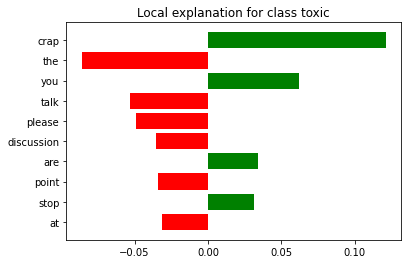

In [13]:
fig = exp.as_pyplot_figure()

In [14]:
exp.show_in_notebook(text = True)

# Classifier model on Balanced Data

Here Oversamping is done by using SMOTE

In [15]:
X_train_new, Y_train_new = SMOTE().fit_sample(vectors, Y_train)
print('Original dataset shape %s' % Counter(Y_train))
print('New dataset shape %s' % Counter(Y_train_new))

Original dataset shape Counter({0: 107581, 1: 12097})
New dataset shape Counter({0: 107581, 1: 107581})


## Perormance Measure

In [17]:
rf_clf = RandomForestClassifier(25)
rf_fit = rf_clf.fit(X_train_new, Y_train_new)

# Applying LIME to make model interpretable

In [18]:
pipe_new = make_pipeline(vectorizer, rf_clf)
pipe_new.predict_proba([dataframe['comment'][0]])

array([[0.88, 0.12]])

In [26]:
counter = -1
for index in Y_train_new:
    counter = counter +1
    if index == 1:
        print(counter)

48
54
58
77
119
120
126
137
153
162
172
215
220
223
228
232
236
256
264
273
280
311
314
326
332
338
345
381
393
394
406
408
412
426
440
455
458
460
465
470
471
482
492
513
518
529
534
535
540
550
558
561
562
571
584
624
625
642
648
660
663
677
695
707
751
760
774
776
780
791
803
808
826
838
846
856
891
894
911
973
975
989
999
1000
1007
1015
1042
1057
1073
1117
1141
1152
1153
1154
1161
1179
1183
1184
1185
1187
1210
1212
1219
1220
1229
1239
1243
1273
1303
1311
1312
1317
1319
1327
1337
1340
1342
1343
1344
1385
1410
1413
1425
1462
1471
1478
1483
1504
1508
1515
1520
1532
1533
1553
1559
1561
1569
1588
1592
1597
1606
1624
1630
1634
1670
1671
1673
1679
1697
1699
1728
1739
1742
1746
1750
1765
1771
1780
1782
1794
1795
1799
1816
1828
1834
1835
1862
1868
1872
1880
1883
1884
1890
1901
1910
1918
1920
1927
1935
1941
1945
1948
1982
1991
2001
2022
2030
2033
2041
2043
2054
2063
2067
2072
2077
2083
2095
2110
2117
2130
2131
2135
2143
2146
2192
2194
2211
2222
2281
2286
2302
2305
2308
2326
2337
2338
2351
23

29473
29475
29478
29485
29493
29504
29505
29510
29517
29534
29540
29548
29558
29567
29569
29575
29585
29592
29599
29600
29617
29630
29636
29637
29646
29651
29653
29660
29661
29663
29692
29697
29699
29701
29705
29707
29719
29733
29735
29743
29754
29756
29757
29766
29784
29792
29818
29826
29828
29831
29838
29850
29858
29871
29873
29889
29890
29913
29916
29938
29973
29986
30004
30032
30048
30051
30057
30063
30066
30078
30084
30088
30103
30105
30108
30113
30117
30123
30124
30131
30135
30137
30151
30169
30185
30191
30204
30211
30218
30223
30230
30238
30239
30259
30269
30274
30279
30294
30313
30316
30328
30329
30332
30345
30351
30364
30373
30376
30381
30387
30418
30452
30459
30463
30465
30476
30496
30521
30522
30525
30534
30546
30555
30570
30577
30586
30595
30605
30612
30618
30631
30635
30639
30653
30654
30657
30681
30688
30697
30705
30716
30719
30721
30725
30731
30737
30740
30742
30758
30767
30770
30789
30795
30803
30810
30811
30816
30826
30830
30847
30848
30861
30874
30877
30887
30894
3091

62655
62672
62687
62720
62734
62742
62745
62749
62761
62766
62777
62791
62795
62797
62808
62809
62810
62813
62820
62832
62859
62861
62862
62899
62904
62907
62908
62912
62915
62940
62987
62989
62993
62994
62998
63007
63010
63013
63015
63026
63036
63037
63062
63066
63068
63073
63082
63084
63091
63094
63100
63119
63127
63135
63145
63146
63153
63156
63178
63183
63185
63192
63198
63202
63222
63249
63268
63277
63285
63286
63287
63295
63301
63303
63305
63312
63321
63327
63334
63343
63351
63352
63376
63428
63432
63445
63457
63460
63470
63479
63485
63486
63495
63497
63504
63510
63511
63525
63535
63538
63539
63548
63552
63564
63606
63608
63610
63622
63628
63634
63650
63659
63661
63669
63680
63690
63704
63709
63717
63735
63743
63756
63787
63812
63820
63832
63834
63846
63851
63861
63868
63905
63906
63914
63920
63922
63927
63942
63953
63958
63963
63966
63982
63985
63990
64001
64002
64024
64025
64031
64033
64047
64053
64060
64071
64082
64091
64092
64098
64111
64120
64129
64131
64160
64183
64211
6421

98310
98318
98329
98344
98357
98376
98381
98391
98400
98414
98427
98431
98434
98453
98455
98470
98475
98478
98479
98483
98490
98494
98520
98527
98540
98542
98548
98573
98578
98587
98591
98594
98597
98622
98632
98639
98665
98666
98668
98674
98681
98693
98710
98725
98727
98747
98752
98770
98794
98799
98809
98836
98840
98852
98855
98869
98880
98902
98909
98929
98938
98955
98957
98958
98967
98973
98980
98985
98999
99007
99010
99016
99020
99058
99062
99068
99075
99076
99082
99100
99107
99127
99132
99135
99138
99141
99145
99152
99158
99165
99166
99172
99173
99178
99183
99197
99200
99203
99205
99207
99209
99210
99221
99225
99234
99243
99244
99254
99258
99265
99268
99275
99282
99288
99296
99300
99341
99342
99347
99354
99364
99365
99371
99372
99375
99376
99390
99395
99396
99404
99405
99431
99432
99438
99442
99458
99461
99466
99476
99483
99499
99530
99533
99569
99577
99579
99612
99619
99638
99645
99648
99657
99658
99666
99668
99675
99705
99720
99726
99734
99737
99744
99746
99750
99762
99769
9977

121576
121577
121578
121579
121580
121581
121582
121583
121584
121585
121586
121587
121588
121589
121590
121591
121592
121593
121594
121595
121596
121597
121598
121599
121600
121601
121602
121603
121604
121605
121606
121607
121608
121609
121610
121611
121612
121613
121614
121615
121616
121617
121618
121619
121620
121621
121622
121623
121624
121625
121626
121627
121628
121629
121630
121631
121632
121633
121634
121635
121636
121637
121638
121639
121640
121641
121642
121643
121644
121645
121646
121647
121648
121649
121650
121651
121652
121653
121654
121655
121656
121657
121658
121659
121660
121661
121662
121663
121664
121665
121666
121667
121668
121669
121670
121671
121672
121673
121674
121675
121676
121677
121678
121679
121680
121681
121682
121683
121684
121685
121686
121687
121688
121689
121690
121691
121692
121693
121694
121695
121696
121697
121698
121699
121700
121701
121702
121703
121704
121705
121706
121707
121708
121709
121710
121711
121712
121713
121714
121715
121716
121717
121718

125576
125577
125578
125579
125580
125581
125582
125583
125584
125585
125586
125587
125588
125589
125590
125591
125592
125593
125594
125595
125596
125597
125598
125599
125600
125601
125602
125603
125604
125605
125606
125607
125608
125609
125610
125611
125612
125613
125614
125615
125616
125617
125618
125619
125620
125621
125622
125623
125624
125625
125626
125627
125628
125629
125630
125631
125632
125633
125634
125635
125636
125637
125638
125639
125640
125641
125642
125643
125644
125645
125646
125647
125648
125649
125650
125651
125652
125653
125654
125655
125656
125657
125658
125659
125660
125661
125662
125663
125664
125665
125666
125667
125668
125669
125670
125671
125672
125673
125674
125675
125676
125677
125678
125679
125680
125681
125682
125683
125684
125685
125686
125687
125688
125689
125690
125691
125692
125693
125694
125695
125696
125697
125698
125699
125700
125701
125702
125703
125704
125705
125706
125707
125708
125709
125710
125711
125712
125713
125714
125715
125716
125717
125718

129575
129576
129577
129578
129579
129580
129581
129582
129583
129584
129585
129586
129587
129588
129589
129590
129591
129592
129593
129594
129595
129596
129597
129598
129599
129600
129601
129602
129603
129604
129605
129606
129607
129608
129609
129610
129611
129612
129613
129614
129615
129616
129617
129618
129619
129620
129621
129622
129623
129624
129625
129626
129627
129628
129629
129630
129631
129632
129633
129634
129635
129636
129637
129638
129639
129640
129641
129642
129643
129644
129645
129646
129647
129648
129649
129650
129651
129652
129653
129654
129655
129656
129657
129658
129659
129660
129661
129662
129663
129664
129665
129666
129667
129668
129669
129670
129671
129672
129673
129674
129675
129676
129677
129678
129679
129680
129681
129682
129683
129684
129685
129686
129687
129688
129689
129690
129691
129692
129693
129694
129695
129696
129697
129698
129699
129700
129701
129702
129703
129704
129705
129706
129707
129708
129709
129710
129711
129712
129713
129714
129715
129716
129717

133575
133576
133577
133578
133579
133580
133581
133582
133583
133584
133585
133586
133587
133588
133589
133590
133591
133592
133593
133594
133595
133596
133597
133598
133599
133600
133601
133602
133603
133604
133605
133606
133607
133608
133609
133610
133611
133612
133613
133614
133615
133616
133617
133618
133619
133620
133621
133622
133623
133624
133625
133626
133627
133628
133629
133630
133631
133632
133633
133634
133635
133636
133637
133638
133639
133640
133641
133642
133643
133644
133645
133646
133647
133648
133649
133650
133651
133652
133653
133654
133655
133656
133657
133658
133659
133660
133661
133662
133663
133664
133665
133666
133667
133668
133669
133670
133671
133672
133673
133674
133675
133676
133677
133678
133679
133680
133681
133682
133683
133684
133685
133686
133687
133688
133689
133690
133691
133692
133693
133694
133695
133696
133697
133698
133699
133700
133701
133702
133703
133704
133705
133706
133707
133708
133709
133710
133711
133712
133713
133714
133715
133716
133717

137574
137575
137576
137577
137578
137579
137580
137581
137582
137583
137584
137585
137586
137587
137588
137589
137590
137591
137592
137593
137594
137595
137596
137597
137598
137599
137600
137601
137602
137603
137604
137605
137606
137607
137608
137609
137610
137611
137612
137613
137614
137615
137616
137617
137618
137619
137620
137621
137622
137623
137624
137625
137626
137627
137628
137629
137630
137631
137632
137633
137634
137635
137636
137637
137638
137639
137640
137641
137642
137643
137644
137645
137646
137647
137648
137649
137650
137651
137652
137653
137654
137655
137656
137657
137658
137659
137660
137661
137662
137663
137664
137665
137666
137667
137668
137669
137670
137671
137672
137673
137674
137675
137676
137677
137678
137679
137680
137681
137682
137683
137684
137685
137686
137687
137688
137689
137690
137691
137692
137693
137694
137695
137696
137697
137698
137699
137700
137701
137702
137703
137704
137705
137706
137707
137708
137709
137710
137711
137712
137713
137714
137715
137716

141574
141575
141576
141577
141578
141579
141580
141581
141582
141583
141584
141585
141586
141587
141588
141589
141590
141591
141592
141593
141594
141595
141596
141597
141598
141599
141600
141601
141602
141603
141604
141605
141606
141607
141608
141609
141610
141611
141612
141613
141614
141615
141616
141617
141618
141619
141620
141621
141622
141623
141624
141625
141626
141627
141628
141629
141630
141631
141632
141633
141634
141635
141636
141637
141638
141639
141640
141641
141642
141643
141644
141645
141646
141647
141648
141649
141650
141651
141652
141653
141654
141655
141656
141657
141658
141659
141660
141661
141662
141663
141664
141665
141666
141667
141668
141669
141670
141671
141672
141673
141674
141675
141676
141677
141678
141679
141680
141681
141682
141683
141684
141685
141686
141687
141688
141689
141690
141691
141692
141693
141694
141695
141696
141697
141698
141699
141700
141701
141702
141703
141704
141705
141706
141707
141708
141709
141710
141711
141712
141713
141714
141715
141716

145712
145713
145714
145715
145716
145717
145718
145719
145720
145721
145722
145723
145724
145725
145726
145727
145728
145729
145730
145731
145732
145733
145734
145735
145736
145737
145738
145739
145740
145741
145742
145743
145744
145745
145746
145747
145748
145749
145750
145751
145752
145753
145754
145755
145756
145757
145758
145759
145760
145761
145762
145763
145764
145765
145766
145767
145768
145769
145770
145771
145772
145773
145774
145775
145776
145777
145778
145779
145780
145781
145782
145783
145784
145785
145786
145787
145788
145789
145790
145791
145792
145793
145794
145795
145796
145797
145798
145799
145800
145801
145802
145803
145804
145805
145806
145807
145808
145809
145810
145811
145812
145813
145814
145815
145816
145817
145818
145819
145820
145821
145822
145823
145824
145825
145826
145827
145828
145829
145830
145831
145832
145833
145834
145835
145836
145837
145838
145839
145840
145841
145842
145843
145844
145845
145846
145847
145848
145849
145850
145851
145852
145853
145854

150073
150074
150075
150076
150077
150078
150079
150080
150081
150082
150083
150084
150085
150086
150087
150088
150089
150090
150091
150092
150093
150094
150095
150096
150097
150098
150099
150100
150101
150102
150103
150104
150105
150106
150107
150108
150109
150110
150111
150112
150113
150114
150115
150116
150117
150118
150119
150120
150121
150122
150123
150124
150125
150126
150127
150128
150129
150130
150131
150132
150133
150134
150135
150136
150137
150138
150139
150140
150141
150142
150143
150144
150145
150146
150147
150148
150149
150150
150151
150152
150153
150154
150155
150156
150157
150158
150159
150160
150161
150162
150163
150164
150165
150166
150167
150168
150169
150170
150171
150172
150173
150174
150175
150176
150177
150178
150179
150180
150181
150182
150183
150184
150185
150186
150187
150188
150189
150190
150191
150192
150193
150194
150195
150196
150197
150198
150199
150200
150201
150202
150203
150204
150205
150206
150207
150208
150209
150210
150211
150212
150213
150214
150215

154450
154451
154452
154453
154454
154455
154456
154457
154458
154459
154460
154461
154462
154463
154464
154465
154466
154467
154468
154469
154470
154471
154472
154473
154474
154475
154476
154477
154478
154479
154480
154481
154482
154483
154484
154485
154486
154487
154488
154489
154490
154491
154492
154493
154494
154495
154496
154497
154498
154499
154500
154501
154502
154503
154504
154505
154506
154507
154508
154509
154510
154511
154512
154513
154514
154515
154516
154517
154518
154519
154520
154521
154522
154523
154524
154525
154526
154527
154528
154529
154530
154531
154532
154533
154534
154535
154536
154537
154538
154539
154540
154541
154542
154543
154544
154545
154546
154547
154548
154549
154550
154551
154552
154553
154554
154555
154556
154557
154558
154559
154560
154561
154562
154563
154564
154565
154566
154567
154568
154569
154570
154571
154572
154573
154574
154575
154576
154577
154578
154579
154580
154581
154582
154583
154584
154585
154586
154587
154588
154589
154590
154591
154592

158572
158573
158574
158575
158576
158577
158578
158579
158580
158581
158582
158583
158584
158585
158586
158587
158588
158589
158590
158591
158592
158593
158594
158595
158596
158597
158598
158599
158600
158601
158602
158603
158604
158605
158606
158607
158608
158609
158610
158611
158612
158613
158614
158615
158616
158617
158618
158619
158620
158621
158622
158623
158624
158625
158626
158627
158628
158629
158630
158631
158632
158633
158634
158635
158636
158637
158638
158639
158640
158641
158642
158643
158644
158645
158646
158647
158648
158649
158650
158651
158652
158653
158654
158655
158656
158657
158658
158659
158660
158661
158662
158663
158664
158665
158666
158667
158668
158669
158670
158671
158672
158673
158674
158675
158676
158677
158678
158679
158680
158681
158682
158683
158684
158685
158686
158687
158688
158689
158690
158691
158692
158693
158694
158695
158696
158697
158698
158699
158700
158701
158702
158703
158704
158705
158706
158707
158708
158709
158710
158711
158712
158713
158714

162571
162572
162573
162574
162575
162576
162577
162578
162579
162580
162581
162582
162583
162584
162585
162586
162587
162588
162589
162590
162591
162592
162593
162594
162595
162596
162597
162598
162599
162600
162601
162602
162603
162604
162605
162606
162607
162608
162609
162610
162611
162612
162613
162614
162615
162616
162617
162618
162619
162620
162621
162622
162623
162624
162625
162626
162627
162628
162629
162630
162631
162632
162633
162634
162635
162636
162637
162638
162639
162640
162641
162642
162643
162644
162645
162646
162647
162648
162649
162650
162651
162652
162653
162654
162655
162656
162657
162658
162659
162660
162661
162662
162663
162664
162665
162666
162667
162668
162669
162670
162671
162672
162673
162674
162675
162676
162677
162678
162679
162680
162681
162682
162683
162684
162685
162686
162687
162688
162689
162690
162691
162692
162693
162694
162695
162696
162697
162698
162699
162700
162701
162702
162703
162704
162705
162706
162707
162708
162709
162710
162711
162712
162713

166571
166572
166573
166574
166575
166576
166577
166578
166579
166580
166581
166582
166583
166584
166585
166586
166587
166588
166589
166590
166591
166592
166593
166594
166595
166596
166597
166598
166599
166600
166601
166602
166603
166604
166605
166606
166607
166608
166609
166610
166611
166612
166613
166614
166615
166616
166617
166618
166619
166620
166621
166622
166623
166624
166625
166626
166627
166628
166629
166630
166631
166632
166633
166634
166635
166636
166637
166638
166639
166640
166641
166642
166643
166644
166645
166646
166647
166648
166649
166650
166651
166652
166653
166654
166655
166656
166657
166658
166659
166660
166661
166662
166663
166664
166665
166666
166667
166668
166669
166670
166671
166672
166673
166674
166675
166676
166677
166678
166679
166680
166681
166682
166683
166684
166685
166686
166687
166688
166689
166690
166691
166692
166693
166694
166695
166696
166697
166698
166699
166700
166701
166702
166703
166704
166705
166706
166707
166708
166709
166710
166711
166712
166713

170571
170572
170573
170574
170575
170576
170577
170578
170579
170580
170581
170582
170583
170584
170585
170586
170587
170588
170589
170590
170591
170592
170593
170594
170595
170596
170597
170598
170599
170600
170601
170602
170603
170604
170605
170606
170607
170608
170609
170610
170611
170612
170613
170614
170615
170616
170617
170618
170619
170620
170621
170622
170623
170624
170625
170626
170627
170628
170629
170630
170631
170632
170633
170634
170635
170636
170637
170638
170639
170640
170641
170642
170643
170644
170645
170646
170647
170648
170649
170650
170651
170652
170653
170654
170655
170656
170657
170658
170659
170660
170661
170662
170663
170664
170665
170666
170667
170668
170669
170670
170671
170672
170673
170674
170675
170676
170677
170678
170679
170680
170681
170682
170683
170684
170685
170686
170687
170688
170689
170690
170691
170692
170693
170694
170695
170696
170697
170698
170699
170700
170701
170702
170703
170704
170705
170706
170707
170708
170709
170710
170711
170712
170713

174856
174857
174858
174859
174860
174861
174862
174863
174864
174865
174866
174867
174868
174869
174870
174871
174872
174873
174874
174875
174876
174877
174878
174879
174880
174881
174882
174883
174884
174885
174886
174887
174888
174889
174890
174891
174892
174893
174894
174895
174896
174897
174898
174899
174900
174901
174902
174903
174904
174905
174906
174907
174908
174909
174910
174911
174912
174913
174914
174915
174916
174917
174918
174919
174920
174921
174922
174923
174924
174925
174926
174927
174928
174929
174930
174931
174932
174933
174934
174935
174936
174937
174938
174939
174940
174941
174942
174943
174944
174945
174946
174947
174948
174949
174950
174951
174952
174953
174954
174955
174956
174957
174958
174959
174960
174961
174962
174963
174964
174965
174966
174967
174968
174969
174970
174971
174972
174973
174974
174975
174976
174977
174978
174979
174980
174981
174982
174983
174984
174985
174986
174987
174988
174989
174990
174991
174992
174993
174994
174995
174996
174997
174998

179069
179070
179071
179072
179073
179074
179075
179076
179077
179078
179079
179080
179081
179082
179083
179084
179085
179086
179087
179088
179089
179090
179091
179092
179093
179094
179095
179096
179097
179098
179099
179100
179101
179102
179103
179104
179105
179106
179107
179108
179109
179110
179111
179112
179113
179114
179115
179116
179117
179118
179119
179120
179121
179122
179123
179124
179125
179126
179127
179128
179129
179130
179131
179132
179133
179134
179135
179136
179137
179138
179139
179140
179141
179142
179143
179144
179145
179146
179147
179148
179149
179150
179151
179152
179153
179154
179155
179156
179157
179158
179159
179160
179161
179162
179163
179164
179165
179166
179167
179168
179169
179170
179171
179172
179173
179174
179175
179176
179177
179178
179179
179180
179181
179182
179183
179184
179185
179186
179187
179188
179189
179190
179191
179192
179193
179194
179195
179196
179197
179198
179199
179200
179201
179202
179203
179204
179205
179206
179207
179208
179209
179210
179211

183569
183570
183571
183572
183573
183574
183575
183576
183577
183578
183579
183580
183581
183582
183583
183584
183585
183586
183587
183588
183589
183590
183591
183592
183593
183594
183595
183596
183597
183598
183599
183600
183601
183602
183603
183604
183605
183606
183607
183608
183609
183610
183611
183612
183613
183614
183615
183616
183617
183618
183619
183620
183621
183622
183623
183624
183625
183626
183627
183628
183629
183630
183631
183632
183633
183634
183635
183636
183637
183638
183639
183640
183641
183642
183643
183644
183645
183646
183647
183648
183649
183650
183651
183652
183653
183654
183655
183656
183657
183658
183659
183660
183661
183662
183663
183664
183665
183666
183667
183668
183669
183670
183671
183672
183673
183674
183675
183676
183677
183678
183679
183680
183681
183682
183683
183684
183685
183686
183687
183688
183689
183690
183691
183692
183693
183694
183695
183696
183697
183698
183699
183700
183701
183702
183703
183704
183705
183706
183707
183708
183709
183710
183711

187568
187569
187570
187571
187572
187573
187574
187575
187576
187577
187578
187579
187580
187581
187582
187583
187584
187585
187586
187587
187588
187589
187590
187591
187592
187593
187594
187595
187596
187597
187598
187599
187600
187601
187602
187603
187604
187605
187606
187607
187608
187609
187610
187611
187612
187613
187614
187615
187616
187617
187618
187619
187620
187621
187622
187623
187624
187625
187626
187627
187628
187629
187630
187631
187632
187633
187634
187635
187636
187637
187638
187639
187640
187641
187642
187643
187644
187645
187646
187647
187648
187649
187650
187651
187652
187653
187654
187655
187656
187657
187658
187659
187660
187661
187662
187663
187664
187665
187666
187667
187668
187669
187670
187671
187672
187673
187674
187675
187676
187677
187678
187679
187680
187681
187682
187683
187684
187685
187686
187687
187688
187689
187690
187691
187692
187693
187694
187695
187696
187697
187698
187699
187700
187701
187702
187703
187704
187705
187706
187707
187708
187709
187710

191476
191477
191478
191479
191480
191481
191482
191483
191484
191485
191486
191487
191488
191489
191490
191491
191492
191493
191494
191495
191496
191497
191498
191499
191500
191501
191502
191503
191504
191505
191506
191507
191508
191509
191510
191511
191512
191513
191514
191515
191516
191517
191518
191519
191520
191521
191522
191523
191524
191525
191526
191527
191528
191529
191530
191531
191532
191533
191534
191535
191536
191537
191538
191539
191540
191541
191542
191543
191544
191545
191546
191547
191548
191549
191550
191551
191552
191553
191554
191555
191556
191557
191558
191559
191560
191561
191562
191563
191564
191565
191566
191567
191568
191569
191570
191571
191572
191573
191574
191575
191576
191577
191578
191579
191580
191581
191582
191583
191584
191585
191586
191587
191588
191589
191590
191591
191592
191593
191594
191595
191596
191597
191598
191599
191600
191601
191602
191603
191604
191605
191606
191607
191608
191609
191610
191611
191612
191613
191614
191615
191616
191617
191618

195567
195568
195569
195570
195571
195572
195573
195574
195575
195576
195577
195578
195579
195580
195581
195582
195583
195584
195585
195586
195587
195588
195589
195590
195591
195592
195593
195594
195595
195596
195597
195598
195599
195600
195601
195602
195603
195604
195605
195606
195607
195608
195609
195610
195611
195612
195613
195614
195615
195616
195617
195618
195619
195620
195621
195622
195623
195624
195625
195626
195627
195628
195629
195630
195631
195632
195633
195634
195635
195636
195637
195638
195639
195640
195641
195642
195643
195644
195645
195646
195647
195648
195649
195650
195651
195652
195653
195654
195655
195656
195657
195658
195659
195660
195661
195662
195663
195664
195665
195666
195667
195668
195669
195670
195671
195672
195673
195674
195675
195676
195677
195678
195679
195680
195681
195682
195683
195684
195685
195686
195687
195688
195689
195690
195691
195692
195693
195694
195695
195696
195697
195698
195699
195700
195701
195702
195703
195704
195705
195706
195707
195708
195709

200067
200068
200069
200070
200071
200072
200073
200074
200075
200076
200077
200078
200079
200080
200081
200082
200083
200084
200085
200086
200087
200088
200089
200090
200091
200092
200093
200094
200095
200096
200097
200098
200099
200100
200101
200102
200103
200104
200105
200106
200107
200108
200109
200110
200111
200112
200113
200114
200115
200116
200117
200118
200119
200120
200121
200122
200123
200124
200125
200126
200127
200128
200129
200130
200131
200132
200133
200134
200135
200136
200137
200138
200139
200140
200141
200142
200143
200144
200145
200146
200147
200148
200149
200150
200151
200152
200153
200154
200155
200156
200157
200158
200159
200160
200161
200162
200163
200164
200165
200166
200167
200168
200169
200170
200171
200172
200173
200174
200175
200176
200177
200178
200179
200180
200181
200182
200183
200184
200185
200186
200187
200188
200189
200190
200191
200192
200193
200194
200195
200196
200197
200198
200199
200200
200201
200202
200203
200204
200205
200206
200207
200208
200209

204066
204067
204068
204069
204070
204071
204072
204073
204074
204075
204076
204077
204078
204079
204080
204081
204082
204083
204084
204085
204086
204087
204088
204089
204090
204091
204092
204093
204094
204095
204096
204097
204098
204099
204100
204101
204102
204103
204104
204105
204106
204107
204108
204109
204110
204111
204112
204113
204114
204115
204116
204117
204118
204119
204120
204121
204122
204123
204124
204125
204126
204127
204128
204129
204130
204131
204132
204133
204134
204135
204136
204137
204138
204139
204140
204141
204142
204143
204144
204145
204146
204147
204148
204149
204150
204151
204152
204153
204154
204155
204156
204157
204158
204159
204160
204161
204162
204163
204164
204165
204166
204167
204168
204169
204170
204171
204172
204173
204174
204175
204176
204177
204178
204179
204180
204181
204182
204183
204184
204185
204186
204187
204188
204189
204190
204191
204192
204193
204194
204195
204196
204197
204198
204199
204200
204201
204202
204203
204204
204205
204206
204207
204208

208566
208567
208568
208569
208570
208571
208572
208573
208574
208575
208576
208577
208578
208579
208580
208581
208582
208583
208584
208585
208586
208587
208588
208589
208590
208591
208592
208593
208594
208595
208596
208597
208598
208599
208600
208601
208602
208603
208604
208605
208606
208607
208608
208609
208610
208611
208612
208613
208614
208615
208616
208617
208618
208619
208620
208621
208622
208623
208624
208625
208626
208627
208628
208629
208630
208631
208632
208633
208634
208635
208636
208637
208638
208639
208640
208641
208642
208643
208644
208645
208646
208647
208648
208649
208650
208651
208652
208653
208654
208655
208656
208657
208658
208659
208660
208661
208662
208663
208664
208665
208666
208667
208668
208669
208670
208671
208672
208673
208674
208675
208676
208677
208678
208679
208680
208681
208682
208683
208684
208685
208686
208687
208688
208689
208690
208691
208692
208693
208694
208695
208696
208697
208698
208699
208700
208701
208702
208703
208704
208705
208706
208707
208708

212565
212566
212567
212568
212569
212570
212571
212572
212573
212574
212575
212576
212577
212578
212579
212580
212581
212582
212583
212584
212585
212586
212587
212588
212589
212590
212591
212592
212593
212594
212595
212596
212597
212598
212599
212600
212601
212602
212603
212604
212605
212606
212607
212608
212609
212610
212611
212612
212613
212614
212615
212616
212617
212618
212619
212620
212621
212622
212623
212624
212625
212626
212627
212628
212629
212630
212631
212632
212633
212634
212635
212636
212637
212638
212639
212640
212641
212642
212643
212644
212645
212646
212647
212648
212649
212650
212651
212652
212653
212654
212655
212656
212657
212658
212659
212660
212661
212662
212663
212664
212665
212666
212667
212668
212669
212670
212671
212672
212673
212674
212675
212676
212677
212678
212679
212680
212681
212682
212683
212684
212685
212686
212687
212688
212689
212690
212691
212692
212693
212694
212695
212696
212697
212698
212699
212700
212701
212702
212703
212704
212705
212706
212707

In [53]:
# no change made to explainer (cell 13)
idx = 264
exp = explainer.explain_instance(X_test[idx], pipe_new.predict_proba, num_features=10)
print('Document id:', idx)
print('Probability(toxic) =', pipe.predict_proba([X_test[idx]])[0,1])
print('True class:', classes[Y_test[idx]])

Document id: 264
Probability(toxic) = 0.9972546256831739
True class: toxic


In [54]:
exp.as_list()

[('to', -0.1435122143583258),
 ('FUCK', 0.1142620388995955),
 ('FUCKED', 0.11366903401245765),
 ('how', -0.10216864596477508),
 ('COCK', 0.06127187943769267),
 ('MOTHER', 0.06126038152993524),
 ('FUCKER', 0.055054939050679985),
 ('You', 0.04618688930322501),
 ('Good', -0.046108910986422724),
 ('know', -0.03636434834565683)]

It has corectly predicted toxic comments

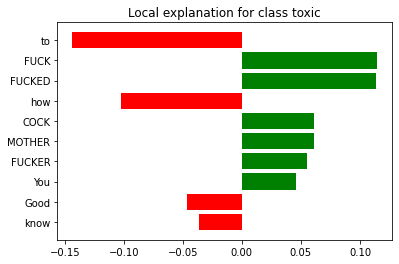

In [55]:
graph = exp.as_pyplot_figure()

In [56]:
exp.show_in_notebook(text = True)